 Loading dataset...

 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 Summary Stats:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642  

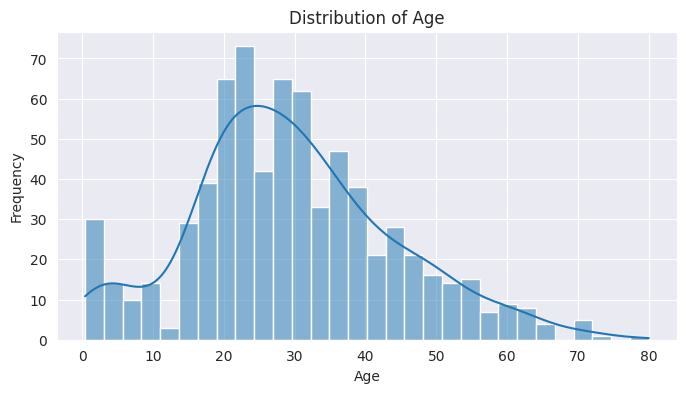

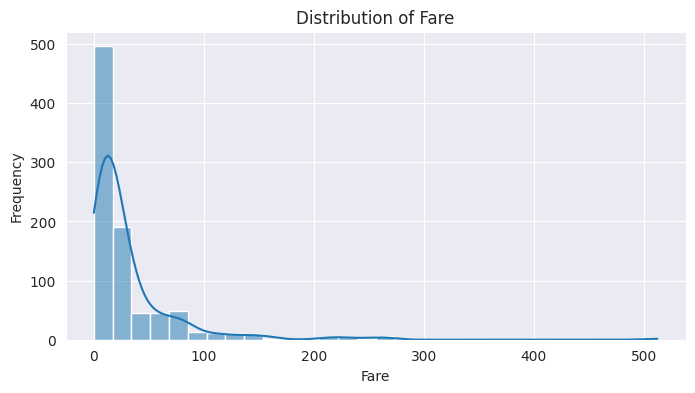

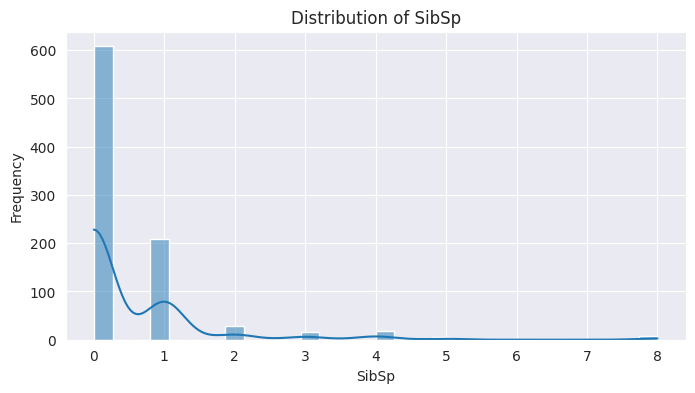

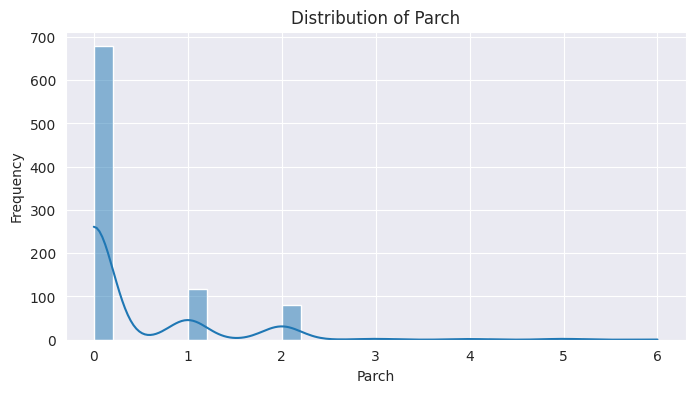

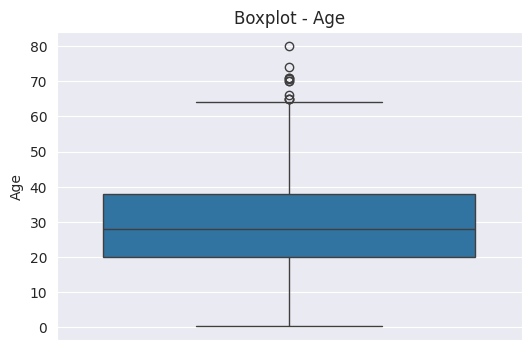

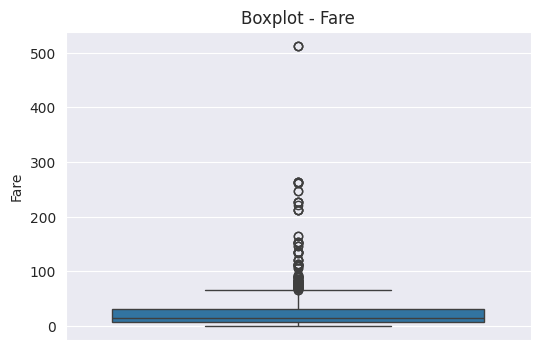

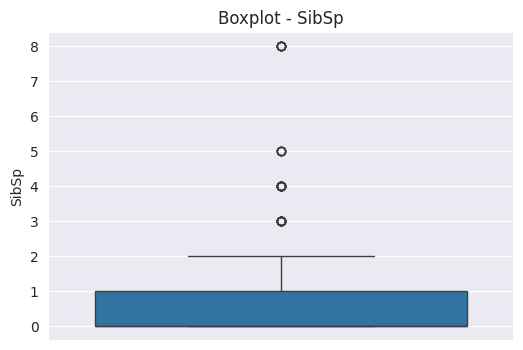

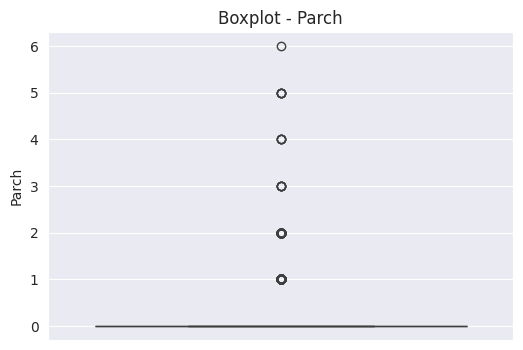

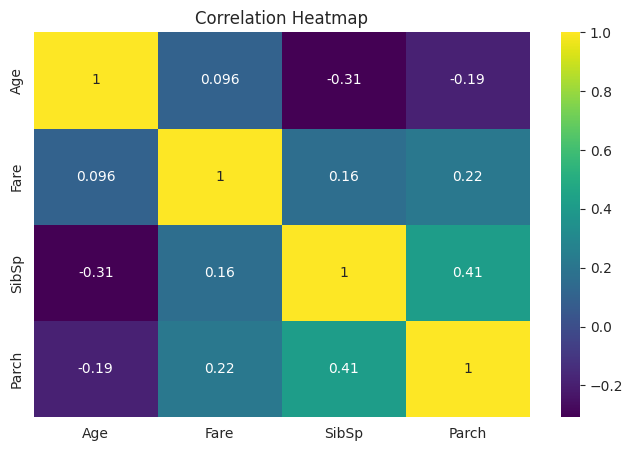

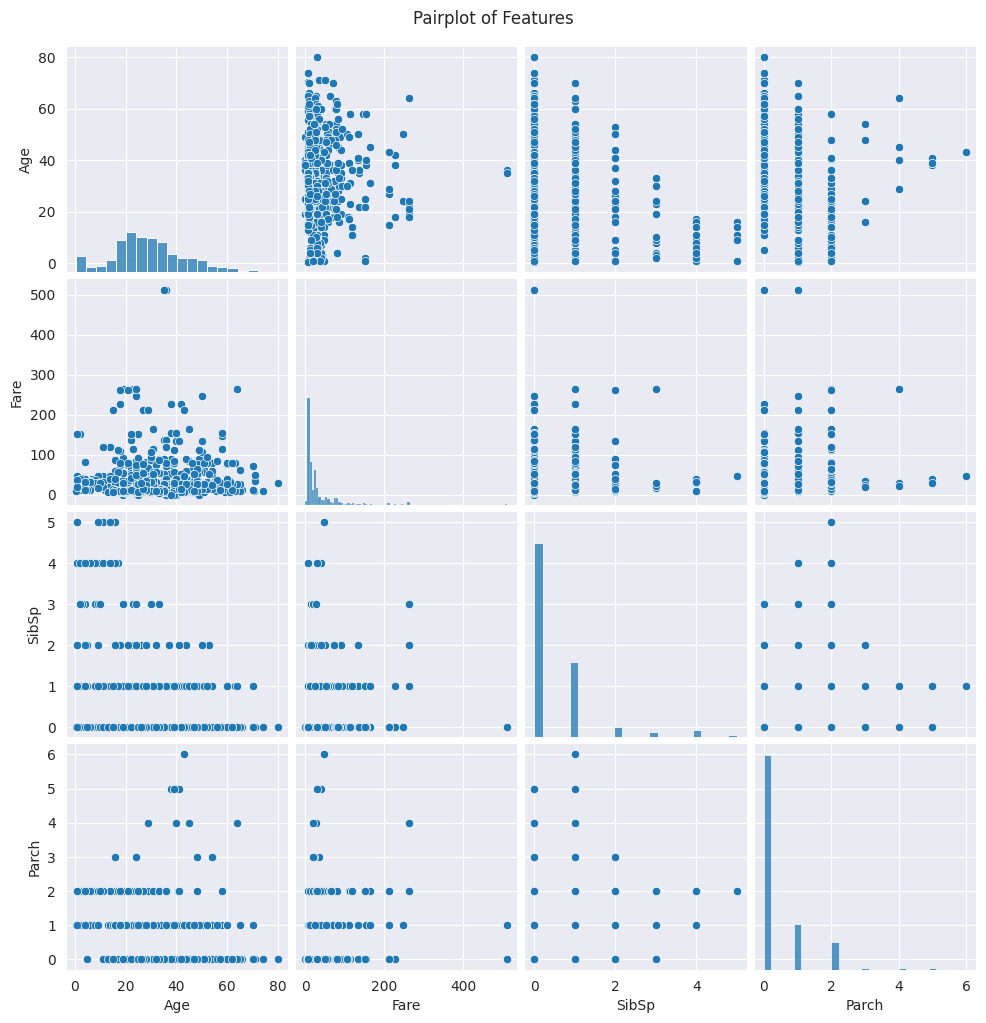

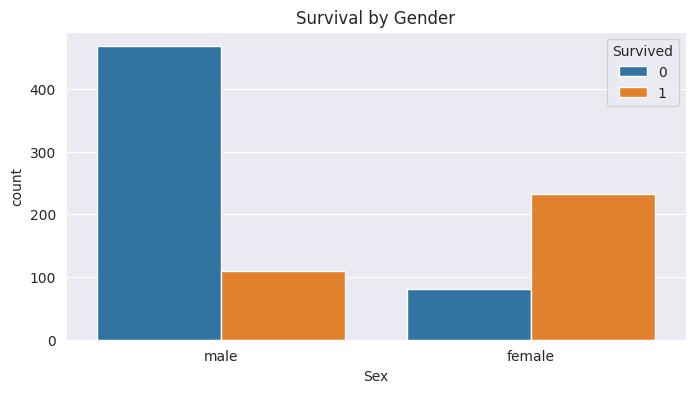

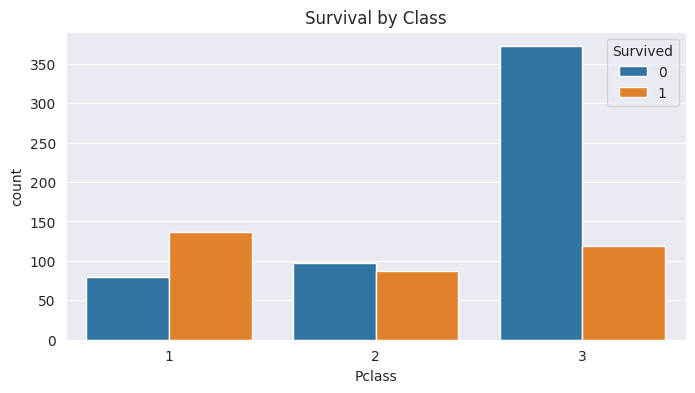


 Skewness Report:
Age: 0.39
Fare: 4.79
SibSp: 3.70
Parch: 2.75

 EDA Complete. Saved as 'titanic_eda_result.csv'.


In [1]:
# Titanic EDA – Modular Version
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px

# Set plot style
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

# ------------------ Load & Inspect Data ------------------ #
def load_data():
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    print(" Loading dataset...")
    return pd.read_csv(url)

def show_basic_info(df):
    print("\n Data Overview:")
    print(df.info())
    print("\n Summary Stats:\n", df.describe())
    print("\n Missing Values:\n", df.isnull().sum())

# ------------------ Visual Exploration ------------------ #
def plot_distributions(df):
    numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

def plot_boxplots(df):
    numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
    for col in numeric_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot - {col}')
        plt.show()

# ------------------ Feature Relationships ------------------ #
def correlation_analysis(df):
    numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(8, 5))
    sns.heatmap(corr_matrix, annot=True, cmap='viridis')
    plt.title("Correlation Heatmap")
    plt.show()

    sns.pairplot(df[numeric_cols].dropna())
    plt.suptitle("Pairplot of Features", y=1.02)
    plt.show()

# ------------------ Categorical Breakdown ------------------ #
def survival_analysis(df):
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x='Sex', hue='Survived')
    plt.title("Survival by Gender")
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x='Pclass', hue='Survived')
    plt.title("Survival by Class")
    plt.show()

# ------------------ Skewness Report ------------------ #
def report_skewness(df):
    print("\n Skewness Report:")
    for col in ['Age', 'Fare', 'SibSp', 'Parch']:
        print(f"{col}: {df[col].dropna().skew():.2f}")

# ------------------ Main Process ------------------ #
def run_eda():
    df = load_data()
    show_basic_info(df)
    plot_distributions(df)
    plot_boxplots(df)
    correlation_analysis(df)
    survival_analysis(df)
    report_skewness(df)

    # Optional Save
    df.to_csv("titanic_eda_result.csv", index=False)
    print("\n EDA Complete. Saved as 'titanic_eda_result.csv'.")

# Run the analysis
run_eda()
